In [2]:
import os
import sys
import time
import numpy as np
import numba as nb
from glob import glob
from datetime import datetime, timedelta
from scipy.interpolate import RegularGridInterpolator

import h5py
import netCDF4 as nc

In [3]:
sys.path.insert(0, '/glade/u/home/ksha/GAN_proj/')
sys.path.insert(0, '/glade/u/home/ksha/GAN_proj/libs/')

from namelist import *
import data_utils as du

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
with h5py.File(save_dir+'CNN_domain.hdf', 'r') as h5io:
    lon_01 = h5io['lon_01'][...]
    lat_01 = h5io['lat_01'][...]
    lon_GFS = h5io['lon_GFS'][...]
    lat_GFS = h5io['lat_GFS'][...]

In [9]:
ERA5_dir = '/glade/campaign/cisl/aiml/ksha/ERA5/ERA5_APCP_2018_2023.nc'

In [110]:
lat_lim = [158, 263]
lon_lim = [218, 459]
grid_shape = lon_GFS.shape

In [111]:
with nc.Dataset(ERA5_dir, 'r') as ncio:
    ERA5_x = ncio['longitude'][...]
    ERA5_y = ncio['latitude'][...]

ERA5_lon, ERA5_lat = np.meshgrid(ERA5_x, ERA5_y)

In [112]:
np.sum(ERA5_lat[lat_lim[0]:(lat_lim[1]), lon_lim[0]:(lon_lim[1]+1)] - lat_GFS)

0.0

In [89]:
q_bins = np.arange(0, 1, 0.01)
N_bins = len(q_bins)
q_ERA5 = np.load('/glade/campaign/cisl/aiml/ksha/ERA5/ERA5_APCP_quantile_temp.npy')
N_hour = 24*(365+365+366+365+365)

In [98]:
with nc.Dataset(ERA5_dir, 'r') as ncio:
    for i, ix in enumerate(range(lat_lim[0], lat_lim[1]+1, 1)):
        for j, iy in enumerate(range(lon_lim[0], lon_lim[1]+1, 1)):
            if np.isnan(q_ERA5[-1, i, j]):
                ERA5_APCP = ncio['tp'][:, 0, ix, iy]
                ERA5_APCP = np.array(ERA5_APCP)[:N_hour]*1000
                ERA5_APCP[ERA5_APCP<1e-7] = 0.0 # ERA5 zero = 6.93889390e-15
                q_ERA5[:, i, j] = np.quantile(ERA5_APCP, q_bins)
                print('/glade/campaign/cisl/aiml/ksha/ERA5/ERA5_APCP_quantile.npy')
                np.save('/glade/campaign/cisl/aiml/ksha/ERA5/ERA5_APCP_quantile.npy', q_ERA5)
            else:
                continue;

/glade/campaign/cisl/aiml/ksha/ERA5/ERA5_APCP_quantile.npy


KeyboardInterrupt: 

In [97]:
q_ERA5[:, -1, 0]

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan])

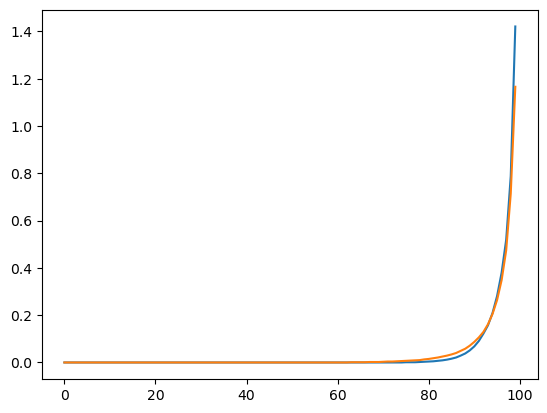

In [95]:
plt.plot(q_ERA5[:, 21, 100])
plt.plot(q_ERA5[:, 1, 100])

In [86]:
np.save('xx.npy', q_ERA5)

In [87]:
i

22

In [88]:
j

124